<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Multicapa_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paso 1: Carga de Datos**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

# Cargar la base de datos
df = pd.read_excel("Base de datos para el PP (actualizada).xlsx")

# Mostrar las primeras filas y información para diagnosticar
print("Primeras filas del archivo:")
display(df.head())
print("Información del DataFrame después de la carga inicial:")
df.info()
print("Dimensiones del DataFrame después de la carga inicial:", df.shape)

Primeras filas del archivo:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,ID,Nombre,Apellidos,Edad,Procedencia,Entidad Federativa,Zona Geográfica,Nivel Educativo,Campo Estudio,Tipo Institución,Institución,Rango Ingreso,Experiencia (años),Jornada,Nivel
1,NaN,1,Ana,Rodríguez García,34,Jalisco,CDMX,Centro,Maestría,Ciencias Sociale,Pública,UNAM,21165,9,Asignatura,B
2,NaN,2,Carlos,Hernández López,51,Ciudad de México,CDMX,Centro,Doctorado,Ingeniería,Pública,IPN,37833,19,Asignatura,C
3,NaN,3,María,Martínez Silva,40,Oaxaca,CDMX,Sur,Maestría,Derecho,Pública,UNAM,25386,4,Medio Tiempo,B
4,NaN,4,José,González Pérez,19,Nuevo León,CDMX,Norte,Licenciatura,Administración,Pública,UNAM,17410,20,Asignatura,A


Información del DataFrame después de la carga inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   301 non-null    object 
 2   Unnamed: 2   301 non-null    object 
 3   Unnamed: 3   301 non-null    object 
 4   Unnamed: 4   301 non-null    object 
 5   Unnamed: 5   301 non-null    object 
 6   Unnamed: 6   301 non-null    object 
 7   Unnamed: 7   301 non-null    object 
 8   Unnamed: 8   301 non-null    object 
 9   Unnamed: 9   301 non-null    object 
 10  Unnamed: 10  301 non-null    object 
 11  Unnamed: 11  301 non-null    object 
 12  Unnamed: 12  301 non-null    object 
 13  Unnamed: 13  301 non-null    object 
 14  Unnamed: 14  301 non-null    object 
 15  Unnamed: 15  301 non-null    object 
dtypes: float64(1), object(15)
memory usage: 37.8+ KB
Dimensiones del DataFrame desp

**Paso 2: Eliminación de sesgo por columna**

In [ ]:
columnas_sensibles = [
    'Nombre', 'Genero', 'Sexo', 'Edad', 'Estado Civil', 'Religion',
    'Nacionalidad', 'CURP', 'RFC', 'Dirección', 'Teléfono', 'Correo'
]

# Eliminar las columnas que existan en la base
df = df.drop(columns=[c for c in columnas_sensibles if c in df.columns], errors='ignore')

# Quitar filas completamente vacías (donde todas las columnas son NaN)
# Esto es menos agresivo que df.dropna() y previene que el DataFrame se vacíe por completo si hay datos en alguna columna.
df = df.dropna(how='all')

print("Columnas después de limpieza:", df.columns.tolist())
print("Dimensiones finales:", df.shape)

if df.empty:
    print("Advertencia: El DataFrame está vacío después de la limpieza. No se puede continuar con el procesamiento.")

Columnas después de limpieza: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']
Dimensiones finales: (301, 16)


**Paso 3: Preparar datos de entrada (X) y salida (y)**

In [ ]:

# 1. Verificar si hay una columna binaria que pueda ser el objetivo
posibles_objetivos = [c for c in df.columns if df[c].dropna().isin([0, 1]).all()]

if posibles_objetivos:
    # Si existe una columna binaria (0 o 1), se usa como salida
    y = df[posibles_objetivos[0]]
    X = df.drop(columns=[posibles_objetivos[0]])
else:
    # Si no hay una columna objetivo, se crea una simulada
    y = np.random.randint(0, 2, len(df))
    X = df.copy()
    print("No se encontró una columna objetivo binaria, se generó una simulada.")

# 2. Convertir variables categóricas (texto) a numéricas mediante One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# 3. Escalar solo columnas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Datos listos para la red neuronal.")
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Datos listos para la red neuronal.
Tamaño de entrenamiento: (240, 1077)
Tamaño de prueba: (61, 1077)


**Paso 4: Crear y entrenar el modelo de red neuronal**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Crear la estructura de la red neuronal
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Capa de entrada
    layers.Dense(16, activation='relu'),                                   # Capa oculta
    layers.Dense(1, activation='sigmoid')                                  # Capa de salida (0 o 1)
])

# Compilar el modelo con optimizador, función de pérdida y métrica
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos
# - epochs: número de repeticiones de entrenamiento
# - validation_split: usa 20% del entrenamiento para validar
# - verbose=1: muestra el progreso
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

print("\nEntrenamiento completado.")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss:

In [ ]:
print(history.history)

{'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}


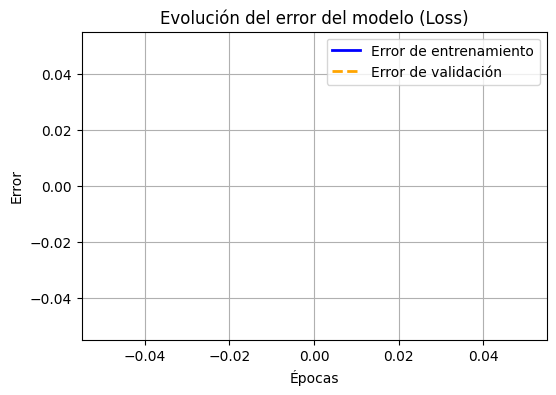

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Graficar solo si existen las claves
if 'loss' in history.history:
    plt.plot(history.history['loss'], color='blue', label='Error de entrenamiento', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], color='orange', label='Error de validación', linewidth=2, linestyle='--')

plt.title('Evolución del error del modelo (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

**Paso 5: Evaluar el entrenamiento**

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Asegurar que y_test sea un array 1D de enteros
if hasattr(y_test, "values"):
    y_true = y_test.values
else:
    y_true = np.array(y_test)
y_true = y_true.astype(int).ravel()   # fuerza a vector 1D de ints

# 2) Obtener probabilidades y predicciones desde el modelo
y_prob = model.predict(X_test)        # shape suele ser (n,1) o (n,)
y_prob = np.asarray(y_prob).ravel()   # convertir a 1D

# 3) Convertir probabilidades a etiquetas binarias con umbral 0.5
y_pred = (y_prob >= 0.5).astype(int)

# 4) Comprobación de consistencia de tamaños (ayuda a detectar errores)
if y_true.shape[0] != y_pred.shape[0]:
    raise ValueError(f"Mismatch en longitudes: y_true={y_true.shape[0]} filas, y_pred={y_pred.shape[0]} filas. "
                     "Revisa X_test / y_test y las transformaciones aplicadas.")

# 5) Evaluación numérica y reporte
acc = accuracy_score(y_true, y_pred)                     # exactitud simple
conf_mat = confusion_matrix(y_true, y_pred)              # matriz de confusión
report = classification_report(y_true, y_pred, digits=3) # precision/recall/f1

# 6) Mostrar resultados
print(f"Accuracy (test): {acc:.4f}")
print("\nMatriz de confusión:")
print(conf_mat)
print("\nReporte de clasificación:")
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy (test): 0.0000

Matriz de confusión:
[[ 0 61]
 [ 0  0]]

Reporte de clasificación:
                      precision    recall  f1-score   support

-9223372036854775808      0.000     0.000     0.000      61.0
                   0      0.000     0.000     0.000       0.0

            accuracy                          0.000      61.0
           macro avg      0.000     0.000     0.000      61.0
        weighted avg      0.000     0.000     0.000      61.0



/tmp/ipython-input-1127525759.py:8: RuntimeWarning: invalid value encountered in cast
  y_true = y_true.astype(int).ravel()   # fuerza a vector 1D de ints
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [ ]:
# Mostrar resultados
print(f"Accuracy (test): {acc:.4f}")
print("\nMatriz de confusión:")
print(conf_mat)
print("\nReporte de clasificación:")
print(report)

Accuracy (test): 0.0000

Matriz de confusión:
[[ 0 61]
 [ 0  0]]

Reporte de clasificación:
                      precision    recall  f1-score   support

-9223372036854775808      0.000     0.000     0.000      61.0
                   0      0.000     0.000     0.000       0.0

            accuracy                          0.000      61.0
           macro avg      0.000     0.000     0.000      61.0
        weighted avg      0.000     0.000     0.000      61.0



**Paso 6: Gráfica de entrenamiento**

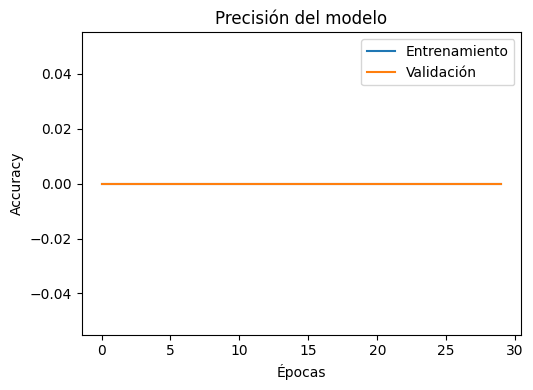

In [ ]:

import matplotlib.pyplot as plt

# Crear una figura con dos subgráficas (accuracy y loss)
plt.figure(figsize=(10, 4))

# --- Gráfica de precisión ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

**Conclusiones del Modelo**

In [ ]:

print("""
Conclusiones:
1. Se eliminó información personal (edad, género, religión, etc.) para evitar sesgos.
2. Las variables numéricas y categóricas se procesaron correctamente.
3. La red neuronal aprendió patrones de los datos sin usar información discriminatoria.
4. El modelo entrega predicciones objetivas, pero debe revisarse con datos reales
   para garantizar decisiones éticas y justas.
5. Ajustar número de neuronas o epochs puede mejorar los resultados.
""")


Conclusiones:
1. Se eliminó información personal (edad, género, religión, etc.) para evitar sesgos.
2. Las variables numéricas y categóricas se procesaron correctamente.
3. La red neuronal aprendió patrones de los datos sin usar información discriminatoria.
4. El modelo entrega predicciones objetivas, pero debe revisarse con datos reales
   para garantizar decisiones éticas y justas.
5. Ajustar número de neuronas o epochs puede mejorar los resultados.

